In [6]:
import pandas as pd
import os

from src.utils.ts_plots import plot_models_forecast

In [3]:
forecast_horizon = 67

preprocessed = pd.read_csv('/home/arazin/main/university/AMLT/data/preprocessed/preprocessed.csv', index_col=0)

train = pd.read_csv('/home/arazin/main/university/AMLT/data/interim/train_preprocessed.csv', index_col=0)
val = pd.read_csv('/home/arazin/main/university/AMLT/data/interim/val_preprocessed.csv', index_col=0)
test = pd.read_csv('/home/arazin/main/university/AMLT/data/interim/test_preprocessed.csv', index_col=0)

arima_forecast_test = pd.read_csv('../data/predicted/arima_prediction.csv', index_col=0)
lstm_forecast_test = pd.read_csv('../data/predicted/lstm_prediction.csv', index_col=0)

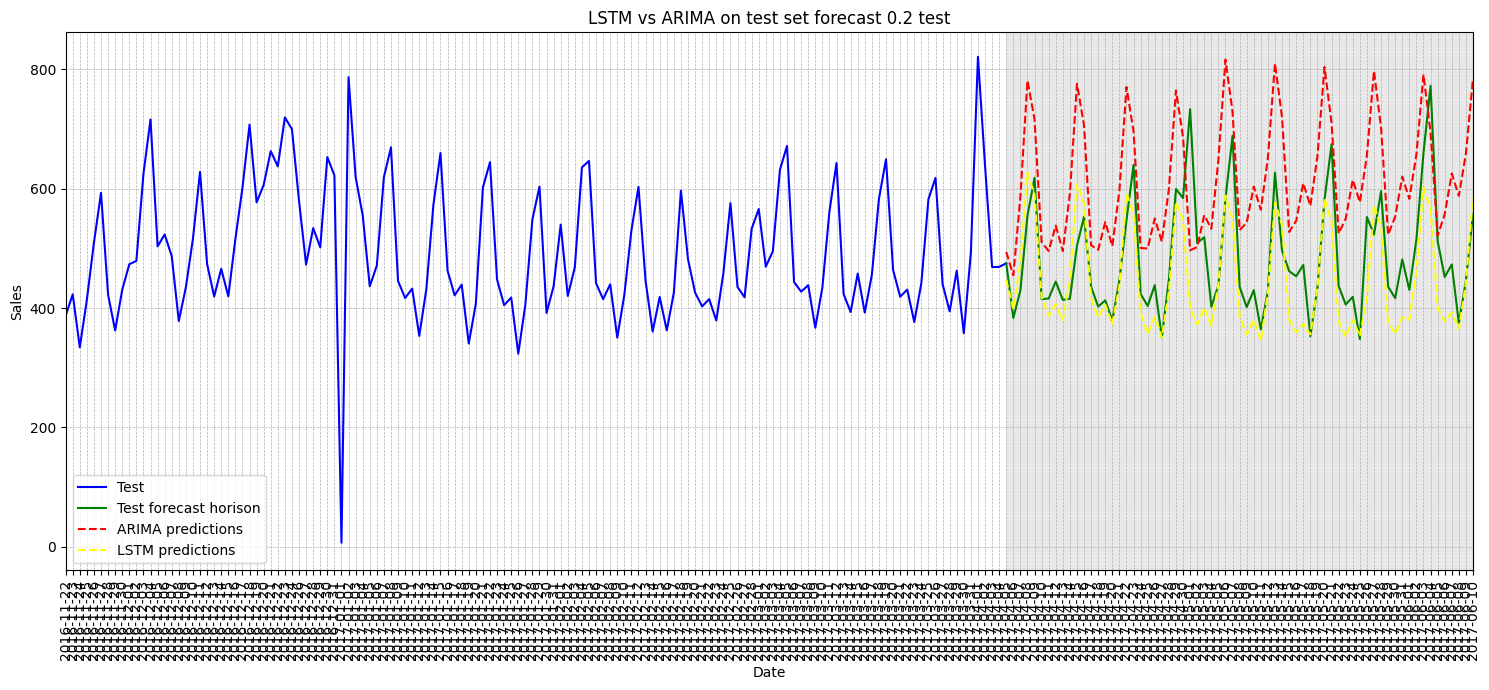

In [4]:
# plot results on test data
fig, ax = plot_models_forecast(
    real_data=preprocessed, 
    train_ids=preprocessed.loc[:arima_forecast_test.index[0]].index, 
    val_ids=test.loc[arima_forecast_test.index[0]:].index, 
    arima_forecast=arima_forecast_test.iloc[:, -forecast_horizon:].values.reshape(-1),
    lstm_forecast=lstm_forecast_test.iloc[-forecast_horizon, -forecast_horizon:].values,
    forecast_horizon=forecast_horizon
)

In [7]:
# Log/Save plots
plot_name = "LSTM vs ARIMA on test set forecast 0.2 test.png"
plot_path = os.path.join('../figures/time_series', plot_name)
fig.savefig(plot_path)